<a href="https://colab.research.google.com/github/Rmkh77/Spam-Mail/blob/main/Spam_mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
spam=pd.read_csv("/content/drive/MyDrive/project_hbic/oasis/email spam/spam.csv",encoding='latin')

In [ ]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
spam.drop(columns= ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [ ]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
new_column_names = {"v1":"Category","v2":"Message"}
spam.rename(columns = new_column_names,inplace = True)

In [ ]:
spam=spam.drop_duplicates()
spam.nunique()

Category       2
Message     5169
dtype: int64

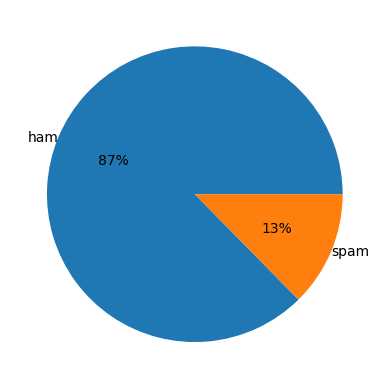

In [ ]:
import matplotlib.pyplot as plt
lst1=spam['Category'].value_counts()
tisland=spam['Category'].unique()
plt.pie(lst1,labels=tisland,labeldistance=1,autopct='%1.0f%%')
plt.show()

In [ ]:
lst=[]
for i in spam['Category']:
  if i=="spam":
    lst.append(0)
  else:
    lst.append(1)
spam['Category']=lst
spam

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
X=spam['Message']
Y=spam['Category']

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [ ]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
X_train=feature_extraction.fit_transform(X_train)
X_test=feature_extraction.transform(X_test)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [ ]:
alg_names=[]
alg_val=[]

In [ ]:
def print_scores(alg, y_true, y_pred):
  print(alg)
  acc_score = accuracy_score(y_true, y_pred)
  print("accuracy: ",acc_score)
  alg_val.append(acc_score)
  print(classification_report(y_test,y_pred))

In [ ]:
model=LogisticRegression()
m1="LogisticRegression"
alg_names.append(m1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print_scores(model,y_test,y_pred)

LogisticRegression()
accuracy:  0.9613152804642167
              precision    recall  f1-score   support

           0       0.98      0.71      0.82       131
           1       0.96      1.00      0.98       903

    accuracy                           0.96      1034
   macro avg       0.97      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [ ]:
model=DecisionTreeClassifier()
m1='DecisionTreeClassifier'
alg_names.append(m1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print_scores(model,y_test,y_pred)

DecisionTreeClassifier()
accuracy:  0.9671179883945842
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       131
           1       0.97      0.99      0.98       903

    accuracy                           0.97      1034
   macro avg       0.94      0.91      0.92      1034
weighted avg       0.97      0.97      0.97      1034



In [ ]:
model=RandomForestClassifier()
m1="RandomForestClassifier"
alg_names.append(m1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print_scores(model,y_test,y_pred)

RandomForestClassifier()
accuracy:  0.97678916827853
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       131
           1       0.98      1.00      0.99       903

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.94      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
model=SVC()
m1='SVC'
alg_names.append(m1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print_scores(model,y_test,y_pred)

SVC()
accuracy:  0.9806576402321083
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       131
           1       0.98      1.00      0.99       903

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



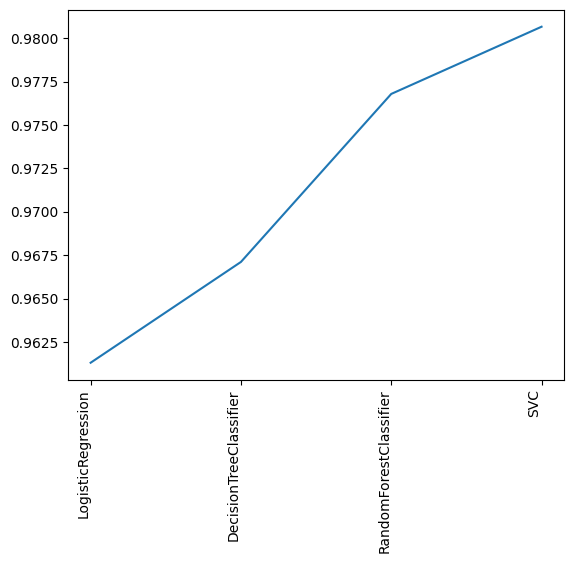

In [ ]:
plt.plot(alg_names,alg_val)
plt.xticks(rotation=90,ha='right')
plt.show()

From the above graph it is clear that Support Vector Classifier shows more accuracy. Hence it is considered for new data point prediction.

In [ ]:
testing=["Congratulations! You've won a free vacation to an exotic island. Just click on the link below to claim your prize."]
testing_input=feature_extraction.transform(testing)
model=SVC()
model.fit(X_train,y_train)
prediction=model.predict(testing_input)
if (prediction)[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail
